In [2]:
import numpy as np
from to_hdf5 import to_hdf5

In [3]:
def label(f):
    if f.find('cat') == -1:
        return np.asarray([0])
    else:
        return np.asarray([1])

In [4]:
to_hdf5('train/*.jpg', 'train.hdf5', label_callback = label)

Extracting features of a total of 25000 files...
25000/25000 [==============================] - 218946s  
Successfully transformed 25000 files
Cleaning up...
25000/25000 [==============================] - 35s    


In [5]:
to_hdf5('test1/*.jpg', 'test.hdf5', label_callback = label)

Extracting features of a total of 12500 files...
12500/12500 [==============================] - 139363s   
Successfully transformed 12500 files
Cleaning up...
12500/12500 [==============================] - 21s    


## Classifying features with Keras

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py

from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils.io_utils import HDF5Matrix

from scipy.misc import imread

Using Theano backend.


In [7]:
X = HDF5Matrix('train.hdf5', 'features', start = 0, end = 20000)
y = HDF5Matrix('train.hdf5', 'labels', start = 0, end = 20000)
Xv = HDF5Matrix('train.hdf5', 'features', start = 20000, end = 25000)
yv = HDF5Matrix('train.hdf5', 'labels', start = 20000, end = 25000)

In [8]:
model = Sequential()
model.add(Dense(100, input_dim = 3072, activation = 'relu'))
model.add(Dropout(.5))
model.add(Dense(1, input_dim = 100, activation = 'sigmoid'))
model.compile('adam', 'binary_crossentropy', class_mode = 'binary')

In [9]:
batch_size = 100
nb_epoch = 10
checkpoint = ModelCheckpoint('best_method.hdf5', monitor = 'val_acc', save_best_only = True)

In [10]:
model.fit(X, y, batch_size=batch_size, nb_epoch=nb_epoch, show_accuracy=True, validation_data=[Xv,yv]
          , callbacks=[checkpoint], shuffle = 'batch')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s - loss: 0.1304 - acc: 0.9487 - val_loss: 0.0948 - val_acc: 0.9604
Epoch 2/10
20000/20000 [==============================] - 5s - loss: 0.0714 - acc: 0.9742 - val_loss: 0.0947 - val_acc: 0.9628
Epoch 3/10
20000/20000 [==============================] - 4s - loss: 0.0497 - acc: 0.9827 - val_loss: 0.1061 - val_acc: 0.9572
Epoch 4/10
20000/20000 [==============================] - 4s - loss: 0.0316 - acc: 0.9892 - val_loss: 0.1103 - val_acc: 0.9606
Epoch 5/10
20000/20000 [==============================] - 4s - loss: 0.0211 - acc: 0.9943 - val_loss: 0.1269 - val_acc: 0.9588
Epoch 6/10
20000/20000 [==============================] - 4s - loss: 0.0155 - acc: 0.9957 - val_loss: 0.1316 - val_acc: 0.9578
Epoch 7/10
20000/20000 [==============================] - 5s - loss: 0.0121 - acc: 0.9971 - val_loss: 0.1402 - val_acc: 0.9574
Epoch 8/10
20000/20000 [==============================] - 5s -

In [11]:
model.load_weights('best_method.hdf5')

In [12]:
Xt = h5py.File('test.hdf5', 'r')

### Some test example

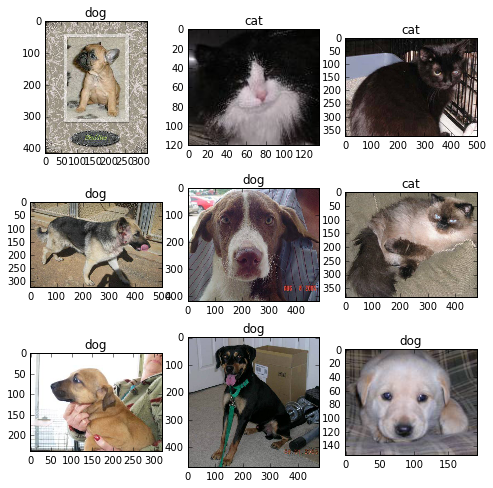

In [27]:
label = ['dog', 'cat']
plt.figure(figsize=[8, 8])
with h5py.File('test.hdf5', 'r') as h5:
    Xt = h5['features']
    with open('test.hdf5.txt') as files:
        for i, f in enumerate(files):
            img = imread(f[:-1])
            predicted = model.predict_classes(Xt[i:i+1], verbose=0)[0]
            pet = label[predicted]
            if i >= 0 and i < 9:
                plt.subplot(3, 3, i+1)
                plt.imshow(img)
                plt.title(pet)
            if i == 9: break